What is necessary to estimate a graident?
__Why do we care about variance reduction? If the estimate is accurate, what does it matter?__


A motivating example??? Show that optimisation with high variance is slower!?

In [129]:
N = 1000
gaussian = lambda mean, stddev: rnd.standard_normal(N)*stddev + mean

def estimate(x):
    # cumlative mean
    return [np.mean(x[:i]) for i in range(1,N)]

m_1 = estimate(gaussian(0, 1))
m_3 = estimate(gaussian(0, 3))
m_5 = estimate(gaussian(0, 5))

Text(0,0.5,'Estimated mean')

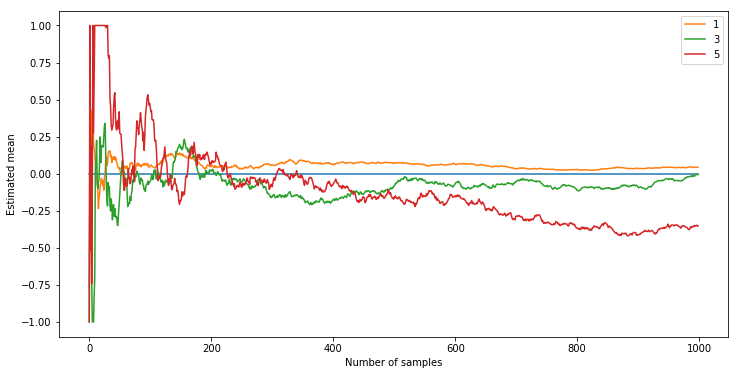

In [130]:
plt.figure(figsize=(12,6))
plt.plot(np.zeros(len(m_1)))
plt.plot(np.clip(m_1, -1, 1), label='1')
plt.plot(np.clip(m_3, -1, 1), label='3')
plt.plot(np.clip(m_5, -1, 1), label='5')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Estimated mean')

Ok, so the mean tends to wander around more if there is more variance. So there must be a bound on the accuracy of the mean, given the variance!? 

$$
\epsilon = \mathbb E[x] - \frac{1}{N}\sum_{i=0}^N x \\
\epsilon = \mathcal O(\sigma)
$$

Still doesnt tell me why high variance matters... It matterns in the context of optimisation because !??!??



Settings that are not differentiable;
* unknown fn
* stochastic (can differentiate, but might not give sensible answers?)
* discrete (and categorical)
* dynamic (closely related to discrete?) 

Kinda/Partially differentiable

* Its too big/dont have access
* 

Strategies

Unknown


Stochastic

* Reparameterisation
* ?

Discrete

* Cts relaxation
* ?

Stochastic and discrete

* Reinforce
* Skip gradient and regularise!? (that DM paper?)
* 

Need some unbiased estimator? But now the framework wont be functional anymore? As we need states to remember things, so we can calculate a mean field? Or we just do a large amount of expensive MC simulations?

In [3]:
def deterministic_fn():
    pass

def stochastic_fn():
    pass

def discrete_fn():
    pass

In [1]:
def dice():
    pass

__Dependencies; reparameterisation-trick, gumbel-trick and REINFORCE?__

## Rebar

Our strategy will be to construct a control variate based on the difference between the REINFORCE gradient estimator for the relaxed model and the gradient estimator from the reparameterization trick.

how does this work with mini-batches!?

What is more similar to our function that another estimate of our fnction? Where can we get an accurate estimate of the mean of our fn?

In [ ]:

def rebar():
    pass


## Control variates


* https://en.wikipedia.org/wiki/Control_variates
* Control Variates By Christiane Lemieux

> In order to reduce the variance $\sigma^2/n$, two approaches are possible. One is to replace the function $\hat h$ by an alternative function $\hat h$ such that $E( h(X))= μ$ but with $Var( h(X))
< σ^2$. This is the idea behind variance reduction techniques. The second approach consists of replacing the iid sampling scheme at the basis of Monte Carlo simulation by quasi-random sampling (see Random Number Generation and Quasi-Monte Carlo), thereby changing the $1/n$ convergence rate of the variance by possibly something as fast as $\mathcal O((log n)^d/n^3 )$, where d is the dimension of the problem. The method of control variates that we are
about to describe falls in the first category of approaches.

?

> First, we must find a random variable W such that μ w = E(W ) can be computed analytically and also such that Y and W are dependent.

?

> To see why this is useful, consider the case where
Y and W are positively correlated. Then if the naive estimator μ ̂ w,n is lower than its expected value of μ w ,
it suggests that probably μ ̂ n is also lower than the unknown μ, and therefore, a positive correction should
be added to it to reduce its error.

?

> As the goal of this technique is to get an estimator with smaller
variance than the naive Monte Carlo estimator, it makes sense to try to choose β so as to minimize the
variance of μ ̂ cv,n .

__Q__; Is tha really true? Sure we dont want to pick b to minimise the variance of the target fn?



__Q__; What about memory limited settings. When you cannot keep thousands of past 

In [104]:
n_samples = 2000

def F(x):
    return 1/(1+x)

samples = rnd.random(n_samples)
f = F(samples)

print(np.mean(f), np.var(f))

0.6894096049174564 0.0207527625636644


In [109]:
mean_g = 3/2  

def G(x):  
    # why this fn!?  
    # can different fns give better results?
    # why sorts of fns give better results? and why?
    # what if g is biased? biased to what alex... the whole point was that we chose a G that wasnt...
    return x + 1

g = G(samples)

c = -np.var(f)/np.cov(f,g)[0,1]  # want to derive this myself
print(c)

output = f + c*(g - mean_g)  
# does this introduce any bias?
# seems like it should, why doesnt it?
# could try prove it? E[f] = E[f + c(g-mu_g)]

print(np.mean(output), np.var(output), np.var(f)/np.var(output))

0.4926751547308839
0.6951174819497753 0.0006568589582909031 31.593940071490394


In [111]:
# ok, so if the control fn is more similar to
# the target fn then we should get more variance reduction?

mean_h = 0.4054  # found using many samples
def H(x):  
    return  1/(x + 2)
h = H(samples)

c = -np.var(f)/np.cov(f,h)[0,1] 
output = f + c*(h - mean_h)  

print(np.mean(output), np.var(output), np.var(f)/np.var(output))

0.6937951872022987 0.00011194780415084685 185.37891583563868


Multiple control varaties. 

In the example above, we are kinda saying, assume F is similar to G. If our sample is from G is a distance from its mean then the sample is also a similar distance from F's mean.
When F isnt like G, this will be wrong, but not a big deal as that is what we used their correlation for. 

_What if we made $c$ a fn of the position of the sample? c(x)? Rather than a single linear approximation of the similarity between F and G we could tune it locally. 

Generalising this to many controls. Constraining F to be within G_i. If sample is greater than G_1, and G_2 but less than G_3 then assume the sample was slightly too high and correct it. (but what if we had extra/partial info that G_3 was very similar to F? -- this is what c is trying to correct for?!)